In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import scipy.stats as st
import numpy.random as npr
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import array
import seaborn as sns
%matplotlib inline

# Part - 1

In [45]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Eval_4/advertising.csv')
df

,Unnamed: 0,Unnamed: 0.1,TV,Radio,Newspaper,Sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,2,3,17.2,45.9,69.3,9.3
3,3,4,151.5,41.3,58.5,18.5
4,4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...,...
195,195,196,38.2,3.7,13.8,7.6
196,196,197,94.2,4.9,8.1,9.7
197,197,198,177.0,9.3,6.4,12.8
198,198,199,283.6,42.0,66.2,25.5


In [46]:
df.head()

,Unnamed: 0,Unnamed: 0.1,TV,Radio,Newspaper,Sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,2,3,17.2,45.9,69.3,9.3
3,3,4,151.5,41.3,58.5,18.5
4,4,5,180.8,10.8,58.4,12.9


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    200 non-null    int64  
 1   Unnamed: 0.1  200 non-null    int64  
 2   TV            200 non-null    float64
 3   Radio         200 non-null    float64
 4   Newspaper     200 non-null    float64
 5   Sales         200 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 9.5 KB


In [48]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,99.500000,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,57.879185,85.854236,14.846809,21.778621,5.217457
min,0.000000,1.000000,0.700000,0.000000,0.300000,1.600000
25%,49.750000,50.750000,74.375000,9.975000,12.750000,10.375000
50%,99.500000,100.500000,149.750000,22.900000,25.750000,12.900000
75%,149.250000,150.250000,218.825000,36.525000,45.100000,17.400000
max,199.000000,200.000000,296.400000,49.600000,114.000000,27.000000


In [49]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['Unnamed: 0.1'], axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


1. Draw (a) a scatter plot of money spent on TV advertisements versus sales (b) Pair plots and
Heatmap.

Text(0, 0.5, 'Sales')

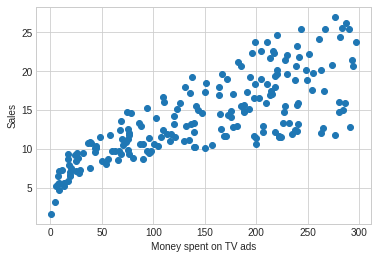

In [50]:
# scatter plot
plt.scatter(df['TV'],df['Sales'])
plt.xlabel('Money spent on TV ads')
plt.ylabel('Sales')

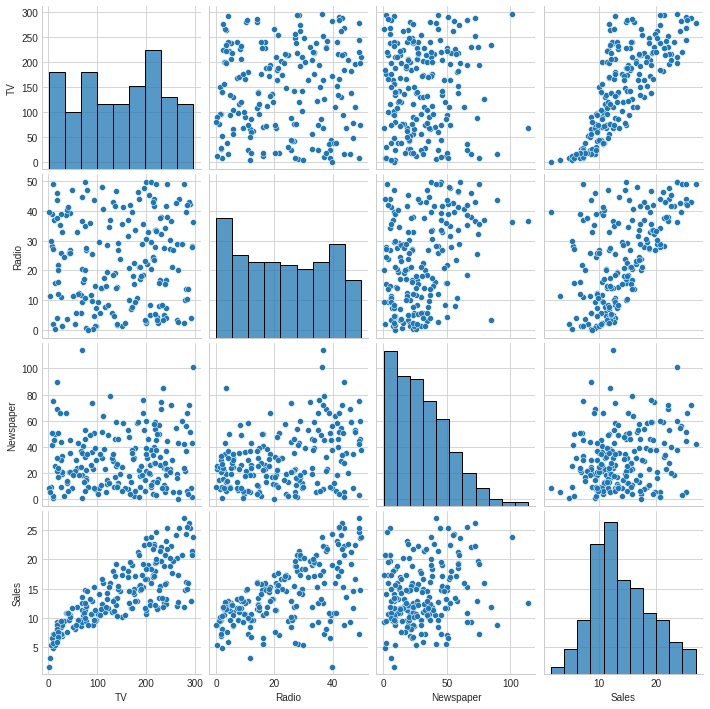

In [51]:
# pairplotd
sns.pairplot(df)

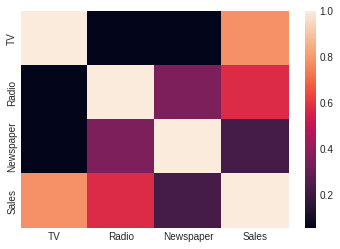

In [52]:
# heatmap
sns.heatmap(df.corr())

2. Develop a Linear Regression model based on money spent on TV advertisements versus Sales.

In [54]:
from sklearn.model_selection import train_test_split

x = df[['TV']]
y = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [55]:
print("Training dataset X shape:", x_train.shape)
print("Training dataset Y shape:",y_train.shape)
print("Testing dataset X shape:",x_test.shape)
print("Testing dataset Y shape:",y_test.shape)

Training dataset X shape: (160, 1)
Training dataset Y shape: (160,)
Testing dataset X shape: (40, 1)
Testing dataset Y shape: (40,)


In [56]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [61]:
score = []

from sklearn.metrics import r2_score

y_predict = linear.predict(x_test)
score0 = r2_score(y_test, y_predict)
score.append(score0)
score0

0.5747439963247203

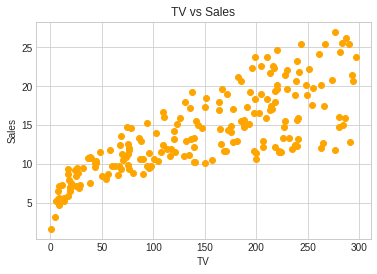

In [62]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

plt.title("TV vs Sales")
plt.xlabel('TV')
plt.ylabel('Sales')

plt.scatter("TV", "Sales", data = df, c='orange')
plt.show()

In [64]:
print("The linear model is: Y = ",linear.intercept_, "+", linear.coef_[0], "X ")

The linear model is: Y =  6.974639391414551 + 0.04832574642247807 X 


3. With the regression line so developed, predict the sales that can be anticipated based on the
money spent on TV advertisements.

In [114]:
y_pred = linear.predict(x_test)
y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.00745091, 6.97597252, 6.9977191 , 7.02296514, 7.02244855,
       7.00326823, 7.0182992 , 6.98067178, 6.99690256, 6.9871041 ,
       7.00533457, 7.01126697, 7.00288496, 6.99833567, 6.99281987,
       6.98675416, 7.00193511, 7.01256677, 6.97592252, 6.98697079,
       6.99468624, 7.0159829 , 7.00671769, 7.01633285, 7.01158359,
       6.97733897, 6.98605427, 6.99750247, 6.97765558, 6.97463939,
       7.01878246, 6.9894704 , 7.01041711, 7.02189864, 7.01030046,
       6.97750561, 7.01448314, 7.01479975, 6.99773577, 7.01504971])

4. Draw the Regression Line superimposing on the data.

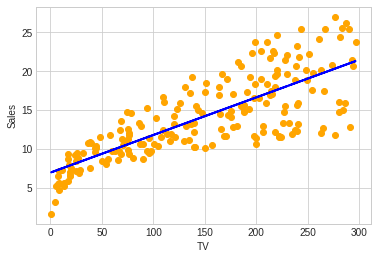

In [65]:
predictions = linear.predict(x)

plt.scatter(df['TV'], df['Sales'], c='orange')
plt.plot(df['TV'], predictions,  c='blue', linewidth=2)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

5. Employ statsmodels.api and run an OLS regressor on the data. Plot the line of regression and
residuals employing libraries of statsmodel. Comment on the heteroscedasticity.


In [67]:
from sklearn.metrics import r2_score
import statsmodels.api as sm

x = df['TV']
y = df['Sales']

x2 = sm.add_constant(x)

est = sm.OLS(y, x2)

est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.47e-42
Time:                        10:42:19   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


P value is very low. This means that there is a strong correlation between these coefficients and the target.

The R² value is 0.612. Therefore, about 61.2% of the variability of Sales is explained by the TV advertisement. This is a satisfactory result for prediction

# Part - 2

1. Import the data set, describe the data and save it on your hard drive. Split the data for training
and testing in the ratio of 80:20.

In [69]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Eval_4/pima-indians-diabetes.csv')
df

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [70]:
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [72]:
df.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [73]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 767 rows and 9 columns


In [74]:
df.columns = ["pregnancies", "glucose", "blood_pressure", "skin_thickness","insulin","bmi","Diabetes_Pedigree_Function","age","outcome"]
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 767 non-null    int64  
 1   glucose                     767 non-null    int64  
 2   blood_pressure              767 non-null    int64  
 3   skin_thickness              767 non-null    int64  
 4   insulin                     767 non-null    int64  
 5   bmi                         767 non-null    float64
 6   Diabetes_Pedigree_Function  767 non-null    float64
 7   age                         767 non-null    int64  
 8   outcome                     767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [76]:
import numpy as np
df.glucose.replace(0,np.nan,inplace = True)
df.insulin.replace(0,np.nan,inplace = True)
df.blood_pressure.replace(0,np.nan,inplace = True)
df.bmi.replace(0,np.nan,inplace = True)
df.skin_thickness.replace(0,np.nan,inplace = True)
df.age.replace(0,np.nan,inplace = True)
df.Diabetes_Pedigree_Function.replace(0,np.nan,inplace = True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 767 non-null    int64  
 1   glucose                     762 non-null    float64
 2   blood_pressure              732 non-null    float64
 3   skin_thickness              540 non-null    float64
 4   insulin                     394 non-null    float64
 5   bmi                         756 non-null    float64
 6   Diabetes_Pedigree_Function  767 non-null    float64
 7   age                         767 non-null    int64  
 8   outcome                     767 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [78]:
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
1,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
2,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0


In [79]:
df = df.fillna(df.mean())
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,1,85.0,66.0,29.000000,155.548223,26.6,0.351,31,0
1,8,183.0,64.0,29.142593,155.548223,23.3,0.672,32,1
2,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
3,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
4,5,116.0,74.0,29.142593,155.548223,25.6,0.201,30,0


In [80]:
df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,121.652231,72.405738,29.142593,155.548223,32.455952,0.471674,33.219035,0.348110
std,3.370877,30.440947,12.104231,8.794137,85.076586,6.879514,0.331497,11.752296,0.476682
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,25.000000,121.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.405738,29.142593,155.548223,32.400000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,155.548223,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [81]:
from sklearn.preprocessing import scale
df['insulin'] = scale(df['insulin'])

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

2. Employ the standard scalar library and rescale the distribution of values so that the mean of
observed values is 0 and the standard deviation is 1.

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
X_train

array([[ 0.06649666,  2.00174807, -0.00896772, ..., -0.59500804,
        -0.76640618,  0.23925174],
       [ 0.06649666, -0.75620374,  0.28835291, ..., -1.34864857,
        -0.7345974 , -1.04800381],
       [ 1.5541774 ,  0.06461525, -0.20797251, ...,  0.41950805,
        -0.56398668,  0.06761766],
       ...,
       [ 0.9591051 , -0.26371235, -0.70429794, ..., -0.73993891,
         0.73728155,  0.06761766],
       [ 0.66156896,  0.09744801,  0.28835291, ...,  0.18761866,
        -1.02955153,  1.78395839],
       [-0.52857564,  0.22877905,  0.1229111 , ...,  0.10066014,
         0.32955084, -0.70473566]])

In [98]:
X_test

array([[ 1.25664125,  1.47642392,  2.76998001, ...,  0.73835596,
        -0.90231642,  0.83997099],
       [ 0.36403281,  0.32727733,  0.61923652, ..., -0.82689743,
        -0.84159057,  3.07121394],
       [ 0.9591051 ,  1.2465946 , -1.53150697, ..., -0.29065321,
         0.32087571,  0.49670285],
       ...,
       [ 0.66156896,  0.39294285,  0.61923652, ...,  1.98476145,
        -0.69122179,  1.0974221 ],
       [-1.12364793, -0.16521407, -0.53885613, ..., -0.24717395,
         0.04616353, -0.96218677],
       [-1.12364793, -0.55920718, -0.37341432, ..., -1.81242735,
        -0.69700521, -0.96218677]])

3. Develop a KNN classifier model and predict for the test data.

In [99]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [100]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

4. Draw up a confusion matrix.

In [103]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[89 12]
 [24 29]]


In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       101
           1       0.71      0.55      0.62        53

    accuracy                           0.77       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



5. Identify an optimum k value based on minimum mean errors (consider a range of 20). Draw a
corresponding graph between Mean error and k-value.

In [107]:
error = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

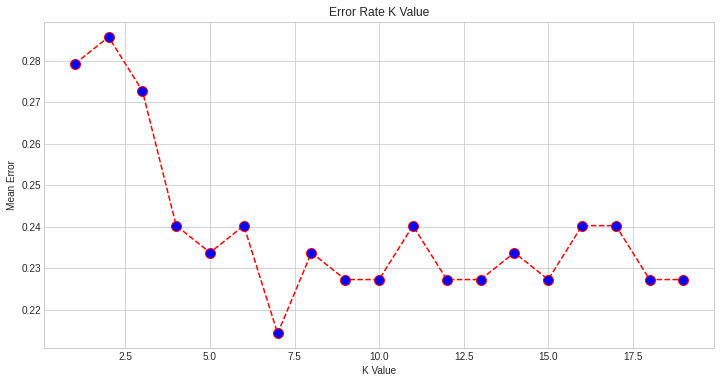

In [108]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')